In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [35]:
incidents = pd.read_csv('../data/sit_209/preprocessed/incidents.csv', index_col=0)
print(f"Incidents shape: {incidents.shape}")
reports = pd.read_csv('../data/sit_209/preprocessed/reports.csv')
print(f"Reports shape: {reports.shape}")
resources = pd.read_csv('../data/sit_209/preprocessed/resources.csv', index_col=0)
print(f"Resources shape: {resources.shape}")
plt.style.use('../fire_style.mplstyle')

Incidents shape: (94099, 31)
Reports shape: (45389, 21)


C:\Users\benja\AppData\Local\Temp\ipykernel_93332\244539117.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  reports = pd.read_csv('../data/sit_209/preprocessed/reports.csv')


Resources shape: (480143, 6)


## Merge study

In [82]:
df = incidents.merge(reports, left_on="INCIDENT_IDENTIFIER", right_on="INC_IDENTIFIER")

In [ ]:
df['REPORT_FROM_DATE'].to_datetime()

In [37]:
left = incidents.merge(reports, left_on="INCIDENT_IDENTIFIER", right_on="INC_IDENTIFIER", how="left")
right = incidents.merge(reports, left_on="INCIDENT_IDENTIFIER", right_on="INC_IDENTIFIER", how="right")
print(len(left), len(right), len(df))

131611 45389 45304


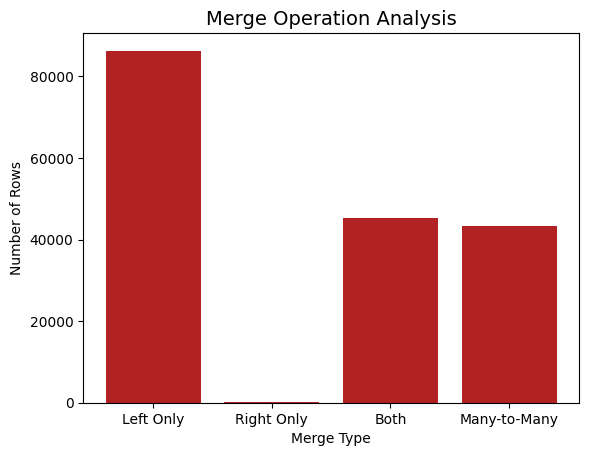

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 and df2 are your dataframes
merged_df = pd.merge(incidents, reports, left_on="INCIDENT_IDENTIFIER", right_on="INC_IDENTIFIER", how='outer', indicator=True)

# Count the number of rows from each original table
left_only = merged_df['_merge'] == 'left_only'
right_only = merged_df['_merge'] == 'right_only'
both = merged_df['_merge'] == 'both'

left_count = merged_df[left_only].shape[0]
right_count = merged_df[right_only].shape[0]
both_count = merged_df[both].shape[0]

# For many-to-many relationships, count the duplicates in 'id'
# Assuming 'id' is not unique in df1 and df2
many_to_many_count = merged_df[both].duplicated(subset='INCIDENT_IDENTIFIER', keep=False).sum()

# Visualize the results
counts = [left_count, right_count, both_count, many_to_many_count]
labels = ['Left Only', 'Right Only', 'Both', 'Many-to-Many']

plt.bar(labels, counts)
plt.xlabel('Merge Type')
plt.ylabel('Number of Rows')
plt.title('Merge Operation Analysis')
plt.show()


how much is missing?

In [39]:
df['INC209R_IDENTIFIER'].nunique()

45304

# Deduplication

In [40]:
duplicated = df[df[['INCIDENT_NUMBER', 'DISCOVERY_DATE', 'INC209R_IDENTIFIER']].duplicated(keep=False)]
len(duplicated)

0

In [41]:
df[df['INCIDENT_IDENTIFIER']==4254800] # 2880290

,ID,INCIDENT_IDENTIFIER,INCIDENT_NUMBER,DONWCGU_PROT_UNIT_IDENTIFIER,INCIDENT_NAME,CAUSE_IDENTIFIER,DISCOVERY_DATE,INCIDENT_AREA,INC_AREA_UOM_IDENTIFIER,EST_IM_COST_TO_DATE,...,ANTICIPATED_COMPLETION_DATE,EXPECTED_CONTAINMENT_DATE,PCT_PERIM_TO_BE_CONTAINED,SECNDRY_FUEL_MODEL_IDENTIFIER,ADDNTL_FUEL_MODEL_IDENTIFIER,GEN_FIRE_BEHAVIOR_IDENTIFIER,FIRE_BEHAVIOR_1_IDENTIFIER,FIRE_BEHAVIOR_2_IDENTIFIER,FIRE_BEHAVIOR_3_IDENTIFIER,year_y


## Variable selection

In [42]:
df.columns

Index(['ID', 'INCIDENT_IDENTIFIER', 'INCIDENT_NUMBER',
       'DONWCGU_PROT_UNIT_IDENTIFIER', 'INCIDENT_NAME', 'CAUSE_IDENTIFIER',
       'DISCOVERY_DATE', 'INCIDENT_AREA', 'INC_AREA_UOM_IDENTIFIER',
       'EST_IM_COST_TO_DATE', 'PCT_CONTAINED_COMPLETED_x', 'CREATED_BY',
       'CREATED_DATE', 'LAST_MODIFIED_BY', 'LAST_MODIFIED_DATE',
       'SINGLE_COMPLEX_FLAG', 'IRWIN_IDENTIFIER',
       'EXT_SYSTEM_LAST_MODIFIED_BY', 'EXT_SYSTEM_LAST_MODIFIED_DATE',
       'FIRECODE', 'NWCG_PROT_UNIT_IDENTIFIER', 'LOCAL_TIMEZONE_IDENTIFIER',
       'CY', 'COMPLEXITY_LEVEL_NARR', 'INCIDENT_COMMANDERS_NARR',
       'COMPLEXITY_LEVEL_IDENTIFIER_x', 'UNIFIED_COMMAND_FLAG',
       'INC_MGMT_ORG_IDENTIFIER', 'year_x', 'SQRT_AREA', 'cause_id',
       'INC209R_IDENTIFIER', 'INC_IDENTIFIER', 'REPORT_FROM_DATE',
       'REPORT_TO_DATE', 'STATUS', 'CURR_INCIDENT_AREA',
       'PCT_CONTAINED_COMPLETED_y', 'COMPLEXITY_LEVEL_IDENTIFIER_y',
       'FUEL_MODEL_IDENTIFIER', 'PROJ_INCIDENT_AREA',
       'PROJ_INC_A

### Date

There are 5 date variables

In [70]:
date_cols =['INCIDENT_IDENTIFIER', 'DISCOVERY_DATE', 'CREATED_DATE', 'LAST_MODIFIED_DATE', 'REPORT_FROM_DATE', 'REPORT_TO_DATE']
df[date_cols].head()

,INCIDENT_IDENTIFIER,DISCOVERY_DATE,CREATED_DATE,LAST_MODIFIED_DATE,REPORT_FROM_DATE,REPORT_TO_DATE
0,2714294,2015-05-04 16:45:00,2015-05-08 10:19:12,2015-05-08 10:19:12,2015-05-05 16:45:00,2015-05-05 19:00:00
1,2714294,2015-05-04 16:45:00,2015-05-08 10:19:12,2015-05-08 10:19:12,2015-05-07 08:00:00,2015-05-07 18:00:00
2,2714324,2015-05-17 12:00:00,2015-05-30 18:40:07,2015-05-30 18:40:07,2015-05-17 12:00:00,2015-05-18 06:00:00
3,2714324,2015-05-17 12:00:00,2015-05-30 18:40:07,2015-05-30 18:40:07,2015-05-25 06:00:00,2015-05-25 17:00:00
4,2714324,2015-05-17 12:00:00,2015-05-30 18:40:07,2015-05-30 18:40:07,2015-05-26 09:00:00,2015-05-26 15:00:00


In [71]:
for column in date_cols[1:]:
        df[column] = pd.to_datetime(df[column])


In [72]:
df['TIME_TO_REPORT'] = df['REPORT_FROM_DATE'] - df['DISCOVERY_DATE']
df['REPORT_DURATION'] = df['REPORT_TO_DATE'] - df['REPORT_FROM_DATE']
df['TIME_TO_CREATE'] = df['CREATED_DATE'] - df['DISCOVERY_DATE']
df['TIME_TO_MODIFY'] = df['LAST_MODIFIED_DATE'] - df['CREATED_DATE']

In [73]:
inf0 = df['TIME_TO_REPORT']<pd.Timedelta(0)
print(f"negative times: {inf0.sum()}")
df.loc[inf0, ]

negative times: 572


,ID,INCIDENT_IDENTIFIER,INCIDENT_NUMBER,DONWCGU_PROT_UNIT_IDENTIFIER,INCIDENT_NAME,CAUSE_IDENTIFIER,DISCOVERY_DATE,INCIDENT_AREA,INC_AREA_UOM_IDENTIFIER,EST_IM_COST_TO_DATE,...,ADDNTL_FUEL_MODEL_IDENTIFIER,GEN_FIRE_BEHAVIOR_IDENTIFIER,FIRE_BEHAVIOR_1_IDENTIFIER,FIRE_BEHAVIOR_2_IDENTIFIER,FIRE_BEHAVIOR_3_IDENTIFIER,year_y,TIME_TO_REPORT,REPORT_DURATION,TIME_TO_CREATE,TIME_TO_MODIFY
30,74,2714697,000046,1525969.0,Saylor Creek Rd,1536117.0,2015-05-28 14:08:00,748.0,1536109.0,NaN,...,NaN,1536370.0,NaN,NaN,NaN,2015,-1 days +11:52:00,1 days 16:00:00,40 days 22:42:03,0 days 00:00:00
35,77,2714724,2015170204,1524992.0,Daniel Road,1536120.0,2015-05-28 13:45:00,550.0,1536109.0,0.0,...,NaN,1536370.0,NaN,NaN,NaN,2015,-1 days +23:45:00,0 days 04:30:00,5 days 04:58:53,0 days 00:00:00
62,112,2720346,000333,1524603.0,Spicer Creek,1536118.0,2015-06-19 16:17:36,98247.1,1536109.0,14048590.0,...,NaN,1536368.0,1536375.0,1536380.0,NaN,2015,-1 days +23:59:24,0 days 07:43:00,110 days 00:16:57,0 days 00:00:00
69,146,2720508,000340,1526072.0,Dulbi River,1536118.0,2015-06-19 18:36:20,54503.0,1536109.0,0.0,...,NaN,1536369.0,1536375.0,NaN,NaN,2015,-1 days +23:53:40,6 days 06:15:00,45 days 04:47:24,0 days 00:00:00
80,163,2720622,000166,1524597.0,Woods Creek,1536117.0,2015-05-21 19:24:10,7.0,1536109.0,53880.0,...,NaN,1536370.0,1536386.0,NaN,NaN,2015,-1 days +21:35:50,1 days 03:00:00,69 days 21:13:48,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42156,18019,9230344,005746,7471530.0,Davis Street,7483988.0,2018-08-05 15:32:00,5.0,7483977.0,1000.0,...,NaN,7484236.0,7484246.0,7484254.0,NaN,2018,-1 days +23:59:00,1 days 00:01:00,9 days 21:30:19,0 days 00:00:00
42220,18185,9236519,001084,7471907.0,CARR,7483985.0,2018-07-23 15:18:00,229651.0,7483977.0,158744844.0,...,7483857.0,7484235.0,7484241.0,7484239.0,7484243.0,2018,-1 days +23:42:00,0 days 03:30:00,149 days 20:44:31,0 days 00:00:01
42333,18416,9231725,000714,7471076.0,Goring,7483986.0,2018-08-03 16:24:00,15046.0,7483977.0,320000.0,...,NaN,NaN,NaN,NaN,NaN,2018,-1 days +22:36:00,1 days 04:00:00,67 days 18:04:58,0 days 00:00:00
42411,18542,9232042,031160,7470264.0,TARINA,7483988.0,2018-08-03 16:48:00,3516.0,7483977.0,400000.0,...,NaN,7484237.0,NaN,NaN,NaN,2018,-1 days +15:12:00,0 days 12:00:00,2 days 03:13:44,0 days 00:00:00


In [74]:
inf0 = df['TIME_TO_CREATE']<pd.Timedelta(0)
df.loc[inf0, date_cols+['TIME_TO_CREATE']]

,INCIDENT_IDENTIFIER,DISCOVERY_DATE,CREATED_DATE,LAST_MODIFIED_DATE,REPORT_FROM_DATE,REPORT_TO_DATE,TIME_TO_CREATE
546,2734693,2015-03-24 16:30:00,2015-02-15 23:23:24,2015-08-11 16:24:34,2014-03-10 15:00:00,2014-03-13 12:30:00,-37 days +06:53:24
547,2734693,2015-03-24 16:30:00,2015-02-15 23:23:24,2015-08-11 16:24:34,2015-03-24 16:30:00,2015-03-25 10:00:00,-37 days +06:53:24
2545,2740415,2015-05-11 12:00:00,2015-05-11 10:21:43,2015-05-15 14:07:02,2015-05-11 12:00:00,2015-05-11 20:00:00,-1 days +22:21:43
2546,2740415,2015-05-11 12:00:00,2015-05-11 10:21:43,2015-05-15 14:07:02,2015-05-12 08:00:00,2015-05-12 17:00:00,-1 days +22:21:43
6019,2844980,2015-06-04 12:45:00,2015-05-05 15:28:24,2015-08-11 13:48:02,2015-06-04 12:45:00,2015-06-04 13:39:00,-30 days +02:43:24
...,...,...,...,...,...,...,...
34929,9044874,2018-04-13 15:30:00,2018-04-07 08:55:29,2018-09-04 14:29:44,2018-04-06 05:00:00,2018-04-07 05:00:00,-7 days +17:25:29
34930,9044874,2018-04-13 15:30:00,2018-04-07 08:55:29,2018-09-04 14:29:44,2018-04-09 05:00:00,2018-04-10 05:00:00,-7 days +17:25:29
34931,9044874,2018-04-13 15:30:00,2018-04-07 08:55:29,2018-09-04 14:29:44,2018-04-12 15:30:00,2018-04-13 15:00:00,-7 days +17:25:29
34932,9044874,2018-04-13 15:30:00,2018-04-07 08:55:29,2018-09-04 14:29:44,2018-09-02 23:00:00,2018-09-03 11:00:00,-7 days +17:25:29


In [75]:
inf0 = df['REPORT_DURATION']<pd.Timedelta(0)
df.loc[inf0, date_cols+['REPORT_DURATION']]

,INCIDENT_IDENTIFIER,DISCOVERY_DATE,CREATED_DATE,LAST_MODIFIED_DATE,REPORT_FROM_DATE,REPORT_TO_DATE,REPORT_DURATION
961,2724922,2015-05-06 01:27:00,2015-06-19 19:56:36,2015-06-19 19:56:36,2015-05-07 01:15:00,2015-05-06 19:00:00,-1 days +17:45:00
10407,2897099,2015-08-08 18:58:00,2015-08-08 19:24:30,2015-08-13 15:54:39,2015-08-08 10:00:00,2015-08-08 06:00:00,-1 days +20:00:00
11064,4385584,2015-08-08 18:58:00,2015-08-08 19:24:30,2015-08-13 15:54:39,2015-08-08 10:00:00,2015-08-08 06:00:00,-1 days +20:00:00


In [76]:
#weird
df.loc[inf0, ['REPORT_FROM_DATE', 'REPORT_TO_DATE']] = df.loc[inf0, ['REPORT_TO_DATE', 'REPORT_FROM_DATE']]

In [77]:
df['REPORT_MEAN_DATE'] = df[['REPORT_FROM_DATE', 'REPORT_TO_DATE']].mean(axis=1)

In [81]:
pd.to_datetime(df['REPORT_MEAN_DATE']).dt.year.describe()

count    45304.000000
mean      2016.514303
std          1.111122
min       2012.000000
25%       2015.000000
50%       2017.000000
75%       2017.000000
max       2018.000000
Name: REPORT_MEAN_DATE, dtype: float64

In [52]:

avg_time_to_report = df['TIME_TO_REPORT'].mean()
median_report_duration = df['REPORT_DURATION'].median()

reporting_frequency = df['INCIDENT_IDENTIFIER'].value_counts()

avg_time_to_report, median_report_duration, reporting_frequency

(Timedelta('12 days 20:10:09.047777876'),
 Timedelta('0 days 23:15:00'),
 INCIDENT_IDENTIFIER
 4327598    179
 2770813    126
 9160942    111
 2744562    111
 2781653    106
           ... 
 9016459      1
 2947629      1
 4433703      1
 9016321      1
 4272921      1
 Name: count, Length: 7792, dtype: int64)

In [53]:
(pd.to_datetime(df['REPORT_TO_DATE']) - pd.to_datetime(df['REPORT_FROM_DATE'])).mean()

Timedelta('1 days 17:47:24.152159453')

## Observation

In [54]:
print(df[['INCIDENT_AREA','CURR_INCIDENT_AREA']].isna().mean())
print(df[['INCIDENT_AREA','CURR_INCIDENT_AREA']].corr())

INCIDENT_AREA         0.001258
CURR_INCIDENT_AREA    0.000265
dtype: float64
                    INCIDENT_AREA  CURR_INCIDENT_AREA
INCIDENT_AREA            1.000000            0.999869
CURR_INCIDENT_AREA       0.999869            1.000000


In [55]:
(df[['PCT_CONTAINED_COMPLETED_x', 'PCT_CONTAINED_COMPLETED_y']]==0).sum()

PCT_CONTAINED_COMPLETED_x    3364
PCT_CONTAINED_COMPLETED_y    9586
dtype: int64

In [56]:
xinfy = (df['PCT_CONTAINED_COMPLETED_x'] <df['PCT_CONTAINED_COMPLETED_y'])
print(f'x<y count : {xinfy.sum()}')
df[xinfy][['INCIDENT_IDENTIFIER', 'PCT_CONTAINED_COMPLETED_x', 'PCT_CONTAINED_COMPLETED_y']]

x<y count : 386


,INCIDENT_IDENTIFIER,PCT_CONTAINED_COMPLETED_x,PCT_CONTAINED_COMPLETED_y
414,2714022,90.0,100.0
416,2714022,90.0,100.0
417,2714022,90.0,100.0
825,2730963,0.0,50.0
893,2727891,75.0,100.0
...,...,...,...
40845,9183107,99.0,100.0
41117,9167730,80.0,82.0
41515,9154970,94.0,100.0
41772,9157935,0.0,8.0


fishy

In [57]:
selected_variables = ['INCIDENT_IDENTIFIER', 'INC209R_IDENTIFIER', 'STATUS', 'cause_id', 'CURR_INCIDENT_AREA', 'PROJ_INCIDENT_AREA', 'PCT_CONTAINED_COMPLETED_y']


In [58]:
dictionnary_mapping = [{'INCIDIENT_IDENTIFIER' : 'fire_id', 'INC209R_IDENTIFIER': 'report_id', }]

In [59]:
import pandas as pd
df['REPORT_FROM_DATE'] = pd.to_datetime(df['REPORT_FROM_DATE'])
df.sort_values(by=['INCIDENT_IDENTIFIER', 'REPORT_FROM_DATE'], inplace=True)

df['NEXT_DAY_CURR_INCIDENT_AREA'] = df.groupby('INCIDENT_IDENTIFIER')['CURR_INCIDENT_AREA'].shift(-1) #get target
df_next_day = df[df['NEXT_DAY_CURR_INCIDENT_AREA'].notna()]


In [60]:
import numpy as np

In [61]:
df_next_day['LOG_CURR_INCIDENT_AREA'] = np.log(1+df_next_day['CURR_INCIDENT_AREA'])
df_next_day['LOG_NEXT_DAY_CURR_INCIDENT_AREA'] = np.log(1+df_next_day['NEXT_DAY_CURR_INCIDENT_AREA'])

C:\Users\benja\AppData\Local\Temp\ipykernel_93332\4248274684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_next_day['LOG_CURR_INCIDENT_AREA'] = np.log(1+df_next_day['CURR_INCIDENT_AREA'])
C:\Users\benja\AppData\Local\Temp\ipykernel_93332\4248274684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_next_day['LOG_NEXT_DAY_CURR_INCIDENT_AREA'] = np.log(1+df_next_day['NEXT_DAY_CURR_INCIDENT_AREA'])


Create all possible features

In [63]:


le = LabelEncoder()
scaler = StandardScaler()

def preprocess_df(df):
    preprocessed_df = df.iloc[:, :].copy()
    #preprocess_df['year'] = preprocess_df['REPORT_FROM_DATE'].dt.year
    #preprocess_df['month'] = preprocess_df['REPORT_FROM_DATE'].dt.month
    cat_cols = ['CAUSE_IDENTIFIER', 'STATUS']#, 'year', 'month']
    #encoded_df = pd.get_dummies(preprocess_df, columns=cat_cols).drop(columns=["REPORT_FROM_DATE", "REPORT_TO_DATE"])
    print(preprocessed_df.columns)
    for col in cat_cols:
        preprocessed_df[col] = le.fit_transform(preprocessed_df[col])

    preprocessed_df = preprocessed_df.drop(columns=["REPORT_FROM_DATE", "REPORT_TO_DATE", 'INCIDENT_IDENTIFIER', 'INC209R_IDENTIFIER'])
    numerical_cols = [col for col in preprocessed_df.columns if col not in cat_cols]
    preprocessed_df[numerical_cols] = scaler.fit_transform(preprocessed_df[numerical_cols])
    return preprocessed_df


preprocessed_df = preprocess_df(df_next_day)
df = preprocessed_df[[col for col in preprocessed_df.columns if col != 'PROJ_INCIDENT_AREA']]
df = df[df[['CURR_INCIDENT_AREA','PCT_CONTAINED_COMPLETED_y', 'NEXT_DAY_CURR_INCIDENT_AREA']].notna().all(axis=1)]
X = df.drop(columns=['NEXT_DAY_CURR_INCIDENT_AREA'])
y= df['NEXT_DAY_CURR_INCIDENT_AREA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=209)


Index(['ID', 'INCIDENT_IDENTIFIER', 'INCIDENT_NUMBER',
       'DONWCGU_PROT_UNIT_IDENTIFIER', 'INCIDENT_NAME', 'CAUSE_IDENTIFIER',
       'DISCOVERY_DATE', 'INCIDENT_AREA', 'INC_AREA_UOM_IDENTIFIER',
       'EST_IM_COST_TO_DATE', 'PCT_CONTAINED_COMPLETED_x', 'CREATED_BY',
       'CREATED_DATE', 'LAST_MODIFIED_BY', 'LAST_MODIFIED_DATE',
       'SINGLE_COMPLEX_FLAG', 'IRWIN_IDENTIFIER',
       'EXT_SYSTEM_LAST_MODIFIED_BY', 'EXT_SYSTEM_LAST_MODIFIED_DATE',
       'FIRECODE', 'NWCG_PROT_UNIT_IDENTIFIER', 'LOCAL_TIMEZONE_IDENTIFIER',
       'CY', 'COMPLEXITY_LEVEL_NARR', 'INCIDENT_COMMANDERS_NARR',
       'COMPLEXITY_LEVEL_IDENTIFIER_x', 'UNIFIED_COMMAND_FLAG',
       'INC_MGMT_ORG_IDENTIFIER', 'year_x', 'SQRT_AREA', 'cause_id',
       'INC209R_IDENTIFIER', 'INC_IDENTIFIER', 'REPORT_FROM_DATE',
       'REPORT_TO_DATE', 'STATUS', 'CURR_INCIDENT_AREA',
       'PCT_CONTAINED_COMPLETED_y', 'COMPLEXITY_LEVEL_IDENTIFIER_y',
       'FUEL_MODEL_IDENTIFIER', 'PROJ_INCIDENT_AREA',
       'PROJ_INC_A

ValueError: could not convert string to float: 'SWD020'

In [67]:
def preprocess(df, features=None, target_transform=None):
  #date
  df['mean_report_date'] = pd.to_datetime(df[['REPORT_FROM_DATE', 'REPORT_TO_DATE']]).mean(axis=1)
  df.sort_values(by=['INCIDENT_IDENTIFIER', 'mean_report_date'], inplace=True)
  
  #target engineering
  df['next_incident_area'] = df.groupby('INCIDENT_IDENTIFIER')['CURR_INCIDENT_AREA'].shift(-1)
  
  df = df[df['NEXT_DAY_CURR_INCIDENT_AREA'].notna()]
  
  if target_transform=='sqrt':
    df['incident_area'] = np.sqrt(df['CURR_INCIDENT_AREA'])
    df['next_incident_area'] = np.sqrt(df['next_incident_area'])

  elif target_transform=='log':
    df['incident_area'] = np.log(1+df['CURR_INCIDENT_AREA'])
    df['next_incident_area'] = np.log(1+df['next_incident_area'])
  else:
    df['incident_area'] = df['incident_area']

  df['year'] = df['REPORT_FROM_DATE'].dt.year
  df['month'] = df['REPORT_FROM_DATE'].dt.month
  
  # feature selection
  df = df[features+['incident_area', 'next_incident_area']]

  #encoding + scaling
  le = LabelEncoder()
  cat_cols = ['CAUSE_IDENTIFIER', 'STATUS', 'year', 'month']
    #encoded_df = pd.get_dummies(preprocess_df, columns=cat_cols).drop(columns=["REPORT_FROM_DATE", "REPORT_TO_DATE"])
  le = LabelEncoder()
  for col in cat_cols:
      df[col] = le.fit_transform(df[col])

  scaler = StandardScaler()
  numerical_cols = [col for col in df.columns if col not in cat_cols+['INCIDENT_IDENTIFIER']]
  df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
  return df
preprocess(df_next_day, features=['CAUSE_IDENTIFIER', 'STATUS', 'year', 'month', 'incident_area'])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

<Axes: >

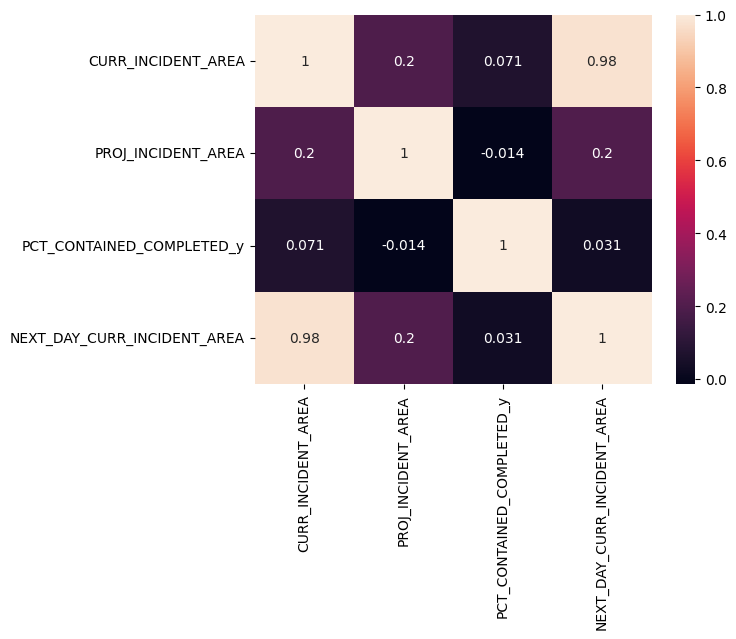

In [ ]:
import seaborn as sns
sns.heatmap(preprocessed_df.iloc[:,2:].corr(), annot=True)

In [ ]:
# Import the necessary module
from sklearn.model_selection import train_test_split

# Assume X and y are defined somewhere above this
# X is your features and y is your target

# Split the data into training and testing sets

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
svr_model = SVR()

In [ ]:

linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
df = preprocessed_df[[col for col in preprocessed_df.columns if col != 'PROJ_INCIDENT_AREA']]
df = df[df[['CURR_INCIDENT_AREA','PCT_CONTAINED_COMPLETED_y', 'NEXT_DAY_CURR_INCIDENT_AREA']].notna().all(axis=1)]
X = df.drop(columns=['NEXT_DAY_CURR_INCIDENT_AREA'])
y= df['NEXT_DAY_CURR_INCIDENT_AREA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=209)


LinearRegression()

In [ ]:

from sklearn.metrics import mean_squared_error
y_pred_lr = linear_regression_model.predict(X_test)
print("Linear Regression MSE: ", mean_squared_error(y_test, y_pred_lr))

Linear Regression MSE:  0.058324091019538025


In [ ]:
X_train

,STATUS,CAUSE_IDENTIFIER,CURR_INCIDENT_AREA,PCT_CONTAINED_COMPLETED_y
40002,1,13,-1.071536,-1.223145
201,2,1,0.444507,-1.223145
41279,2,13,1.735516,0.858827
38459,2,13,1.290626,0.468457
14439,2,4,0.925885,0.130136
...,...,...,...,...
20538,2,4,-0.167028,0.624605
293,2,1,1.535377,-1.223145
10355,2,1,-0.812935,-0.702652
25336,2,11,-1.155953,-1.223145


Intercept:  0.08426457802379983
Coefficients:  [-4.89795005e-02  5.63929445e-04  9.86115467e-01 -3.78074919e-02]
R2:  0.943092478081508


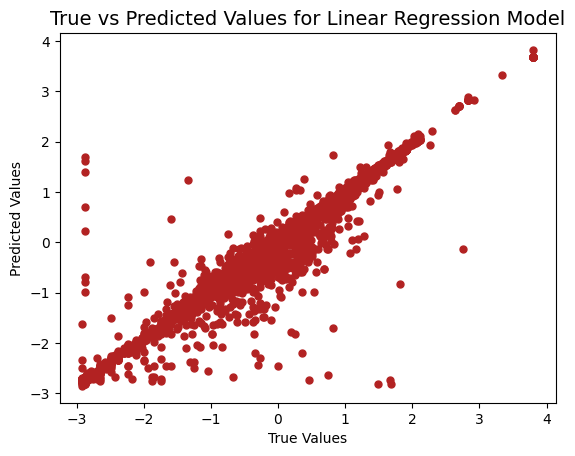

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

linear_regression_model.fit(X_train, y_train)

print("Intercept: ", linear_regression_model.intercept_)
print("Coefficients: ", linear_regression_model.coef_)

# Predict the target variable on the testing data
y_pred = linear_regression_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

plt.scatter(y_test, y_pred)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Linear Regression Model')
plt.show()


In [ ]:
X_train

,INCIDENT_IDENTIFIER,INC209R_IDENTIFIER,STATUS,CAUSE_IDENTIFIER,CURR_INCIDENT_AREA,PCT_CONTAINED_COMPLETED_y
40002,1.248276,1.248131,1,13,-1.071536,-1.223145
201,-1.371382,-1.371531,2,1,0.444507,-1.223145
41279,1.275079,1.275056,2,13,1.735516,0.858827
38459,1.268385,1.268398,2,13,1.290626,0.468457
14439,-0.714185,-0.714231,2,4,0.925885,0.130136
...,...,...,...,...,...,...
20538,-0.669934,-0.670001,2,4,-0.167028,0.624605
293,-1.369654,-1.369795,2,1,1.535377,-1.223145
10355,-1.296979,-1.297107,2,1,-0.812935,-0.702652
25336,0.484003,0.484060,2,11,-1.155953,-1.223145


In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:     NEXT_DAY_CURR_INCIDENT_AREA   R-squared:                       0.957
Model:                                     OLS   Adj. R-squared:                  0.957
Method:                          Least Squares   F-statistic:                 1.653e+05
Date:                         Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                                 15:52:36   Log-Likelihood:                 4588.2
No. Observations:                        29990   AIC:                            -9166.
Df Residuals:                            29985   BIC:                            -9125.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [ ]:
le = LabelEncoder()
scaler = StandardScaler()

def preprocess_df(df):
    preprocessed_df = df.iloc[:, :].copy()
    #preprocess_df['year'] = preprocess_df['REPORT_FROM_DATE'].dt.year
    #preprocess_df['month'] = preprocess_df['REPORT_FROM_DATE'].dt.month
    cat_cols = ['CAUSE_IDENTIFIER', 'STATUS']#, 'year', 'month']
    preprocessed_df = pd.get_dummies(preprocessed_df, columns=cat_cols)
    print(preprocessed_df.columns)
    #for col in cat_cols:
     #   preprocessed_df[col] = le.fit_transform(preprocessed_df[col])

    preprocessed_df = preprocessed_df.drop(columns=["REPORT_FROM_DATE", "REPORT_TO_DATE" , "INCIDENT_IDENTIFIER", "INC209R_IDENTIFIER"])
    numerical_cols = [col for col in preprocessed_df.columns if col not in cat_cols]
    preprocessed_df[numerical_cols] = scaler.fit_transform(preprocessed_df[numerical_cols])
    return preprocessed_df


preprocessed_df = preprocess_df(df_next_day)
df = preprocessed_df[[col for col in preprocessed_df.columns if col != 'PROJ_INCIDENT_AREA']]
df = df[df[['CURR_INCIDENT_AREA','PCT_CONTAINED_COMPLETED_y', 'NEXT_DAY_CURR_INCIDENT_AREA']].notna().all(axis=1)]
X = df.drop(columns=['NEXT_DAY_CURR_INCIDENT_AREA'])
y= df['NEXT_DAY_CURR_INCIDENT_AREA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=209)

Index(['INCIDENT_IDENTIFIER', 'INC209R_IDENTIFIER', 'REPORT_FROM_DATE',
       'REPORT_TO_DATE', 'CURR_INCIDENT_AREA', 'PROJ_INCIDENT_AREA',
       'PCT_CONTAINED_COMPLETED_y', 'NEXT_DAY_CURR_INCIDENT_AREA',
       'CAUSE_IDENTIFIER_1536117.0', 'CAUSE_IDENTIFIER_1536118.0',
       'CAUSE_IDENTIFIER_1536119.0', 'CAUSE_IDENTIFIER_1536120.0',
       'CAUSE_IDENTIFIER_2990063.0', 'CAUSE_IDENTIFIER_2990064.0',
       'CAUSE_IDENTIFIER_2990065.0', 'CAUSE_IDENTIFIER_2990066.0',
       'CAUSE_IDENTIFIER_4496045.0', 'CAUSE_IDENTIFIER_4496046.0',
       'CAUSE_IDENTIFIER_4496047.0', 'CAUSE_IDENTIFIER_4496048.0',
       'CAUSE_IDENTIFIER_7483985.0', 'CAUSE_IDENTIFIER_7483986.0',
       'CAUSE_IDENTIFIER_7483987.0', 'CAUSE_IDENTIFIER_7483988.0', 'STATUS_F',
       'STATUS_I', 'STATUS_U'],
      dtype='object')


In [ ]:
linear_regression_model.fit(X_train, y_train)
y_pred_lr = linear_regression_model.predict(X_test)
print("Linear Regression MSE: ", mean_squared_error(y_test, y_pred_lr))

Linear Regression MSE:  0.058132097507936104


Intercept:  -0.0002523897534943099
Coefficients:  [ 9.87403132e-01 -3.51332942e-02 -4.50752198e+11 -8.96343832e+11
 -3.97199013e+10 -4.89004430e+11 -6.53908320e+11 -6.70794456e+11
 -1.25620427e+10 -5.31661634e+11 -6.27961267e+11 -8.54368530e+11
 -1.54056017e+11 -6.55127740e+11 -6.33523681e+11 -7.66476404e+11
 -1.69061857e+11 -5.78691515e+11 -1.45013791e+10 -4.14605270e+10
 -4.31746617e+10]
R2:  0.9432798084758391


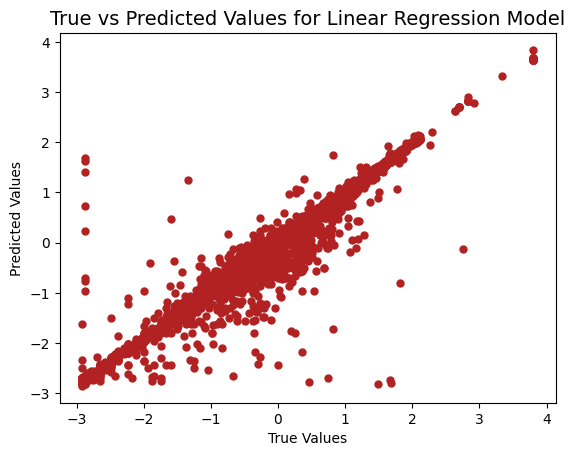

In [ ]:
print("Intercept: ", linear_regression_model.intercept_)
print("Coefficients: ", linear_regression_model.coef_)

# Predict the target variable on the testing data
y_pred = linear_regression_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

plt.scatter(y_test, y_pred)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Linear Regression Model')
plt.show()

In [ ]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:     NEXT_DAY_CURR_INCIDENT_AREA   R-squared:                       0.957
Model:                                     OLS   Adj. R-squared:                  0.957
Method:                          Least Squares   F-statistic:                 3.162e+04
Date:                         Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                                 14:59:09   Log-Likelihood:                 4657.5
No. Observations:                        29990   AIC:                            -9271.
Df Residuals:                            29968   BIC:                            -9088.
Df Model:                                   21                                         
Covariance Type:                     nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Linear Regression MSE: ", mean_squared_error(y_test, y_pred_lr))
print("Decision Tree MSE: ", mean_squared_error(y_test, y_pred_dt))
print("Random Forest MSE: ", mean_squared_error(y_test, y_pred_rf))
print("SVR MSE: ", mean_squared_error(y_test, y_pred_svr))

Linear Regression MSE:  0.08627282871466105
Decision Tree MSE:  0.11954987792870217
Random Forest MSE:  0.09496982802322926
SVR MSE:  0.0894830984045423


## Adding treatment

In [ ]:
pivot_df = pd.pivot_table(resources,
                          values=['RESOURCE_QUANTITY', 'RESOURCE_PERSONNEL'],
                          index=['INC209R_IDENTIFIER'],
                          columns=['resource'],
                          aggfunc='sum',
                          fill_value=0)

# Flatten the multi-level column index
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

# Reset index to make it look like a regular DataFrame
pivot_df.reset_index(inplace=True)

In [ ]:
personnel = resources.groupby("INC209R_IDENTIFIER")["RESOURCE_PERSONNEL"].sum().to_frame().reset_index()


In [ ]:
df = df_next_day.merge(personnel, on='INC209R_IDENTIFIER', how='left')

,INCIDENT_IDENTIFIER,INC209R_IDENTIFIER,REPORT_FROM_DATE,REPORT_TO_DATE,STATUS,CAUSE_IDENTIFIER,CURR_INCIDENT_AREA,PROJ_INCIDENT_AREA,PCT_CONTAINED_COMPLETED_y,NEXT_DAY_CURR_INCIDENT_AREA,RESOURCE_PERSONNEL
0,2714022,2714023,2015-05-05 09:30:00,2015-05-07 11:00:00,I,1536120.0,5.017280,NaN,90.0,5.620401,45.0
1,2714022,2714037,2015-05-07 11:00:00,2015-05-08 14:00:00,U,1536120.0,5.620401,NaN,100.0,5.620401,45.0
2,2714022,2714050,2015-05-08 11:00:00,2015-05-09 14:00:00,U,1536120.0,5.620401,275.0,100.0,5.620401,33.0
3,2714081,2714082,2015-05-06 20:30:00,2015-05-07 18:00:00,I,1536117.0,5.327876,220.0,60.0,5.327876,21.0
4,2714081,2714097,2015-05-07 18:15:00,2015-05-08 14:00:00,U,1536117.0,5.327876,220.0,60.0,5.332719,15.0
...,...,...,...,...,...,...,...,...,...,...,...
37507,9276339,9276401,2018-06-12 16:00:00,2018-06-13 15:00:00,U,7483985.0,4.615121,NaN,71.0,4.615121,109.0
37508,9276448,9276458,2018-06-10 01:00:00,2018-06-14 18:15:00,I,7483986.0,6.184149,NaN,0.0,8.114325,NaN
37509,9276448,9276449,2018-06-14 21:45:00,2018-06-21 21:45:00,U,7483986.0,8.114325,NaN,0.0,8.135054,NaN
37510,9276448,9276476,2018-06-21 21:45:00,2018-06-28 22:45:00,U,7483986.0,8.135054,3500.0,0.0,8.134761,NaN
